In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
titanic_df = pd.read_csv('datasets/titanic/train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df = titanic_df.drop(columns={'PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'})
titanic_df = pd.get_dummies(titanic_df, columns=['Sex']).drop(columns='Sex_female')
titanic_df.head()

,Survived,Pclass,Age,Fare,Sex_male
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


In [4]:
titanic_df.isna().any()

Survived    False
Pclass      False
Age          True
Fare        False
Sex_male    False
dtype: bool

In [5]:
titanic_df = titanic_df.fillna({'Age': titanic_df['Age'].median()})
titanic_df.isna().any()

Survived    False
Pclass      False
Age         False
Fare        False
Sex_male    False
dtype: bool

In [6]:
from sklearn.model_selection import train_test_split
X = titanic_df.drop(columns='Survived')
y = titanic_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Простой kNN

Простой kNN с евклидовой метрикой. Поиск соседей производится полным перебором. Выбирается наиболее частый класс.

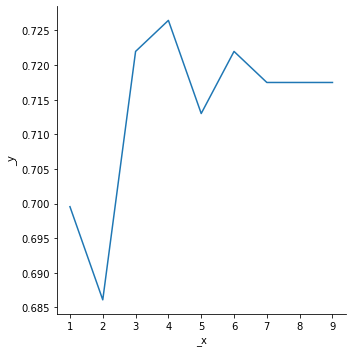

In [12]:
from metric_methods import kNearestNeighbors
from quality_functional import Accuracy

accuracies = []

for k in range(1, 10):
    kNN = kNearestNeighbors(k=k, X = X_train, y = y_train, metric='euclidian',
                                choice_method='maxentry', search_method='exhaustive')
    y_pred = kNN.predict(X_test)
    accuracies.append(Accuracy.get_accuracy(y_pred, y_test.to_numpy()))
sns.relplot(x=list(range(1, 10)), y=accuracies, kind='line')

Полный перебор работает очень медленно

Тот же kNN, но метрика манхеттоновская.

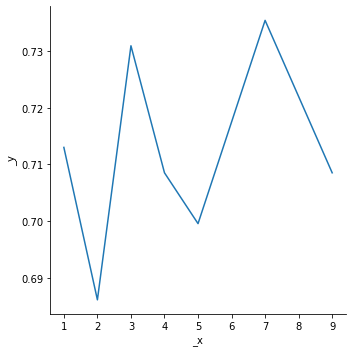

In [14]:
accuracies = []

for k in range(1, 10):
    kNN = kNearestNeighbors(k=k, X = X_train, y = y_train, metric='manhattan',
                                choice_method='maxentry', search_method='exhaustive')
    y_pred = kNN.predict(X_test)
    accuracies.append(Accuracy.get_accuracy(y_pred, y_test.to_numpy()))
sns.relplot(x=list(range(1, 10)), y=accuracies, kind='line')

Косинусное расстояние

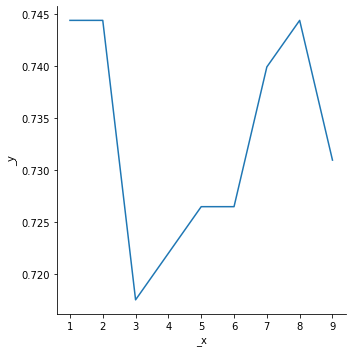

In [15]:
accuracies = []

for k in range(1, 10):
    kNN = kNearestNeighbors(k=k, X = X_train, y = y_train, metric='cosine',
                                choice_method='maxentry', search_method='exhaustive')
    y_pred = kNN.predict(X_test)
    accuracies.append(Accuracy.get_accuracy(y_pred, y_test.to_numpy()))
sns.relplot(x=list(range(1, 10)), y=accuracies, kind='line')

Взвешенный kNN (гауссовское ядро)

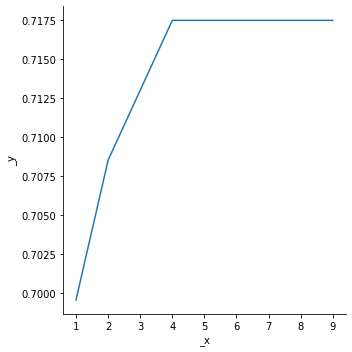

In [22]:
accuracies = []
for k in range(1, 10):
    kNN = kNearestNeighbors(k=k, X = X_train, y = y_train, metric='euclidian',
                                choice_method='weighted', search_method='exhaustive',
                               window_width=1)
    y_pred = kNN.predict(X_test)
    accuracies.append(Accuracy.get_accuracy(y_pred, y_test.to_numpy()))
sns.relplot(x=list(range(1, 10)), y=accuracies, kind='line')

Подберем ширину окна (k оставим равным 5)

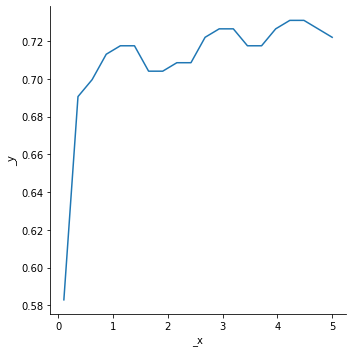

In [23]:
accuracies = []
for h in np.linspace(0.1, 5, num=20):
    kNN = kNearestNeighbors(k=k, X = X_train, y=y_train, metric='euclidian',
                               choice_method='weighted', window_width=h, search_method='exhaustive')
    y_pred = kNN.predict(X_test)
    accuracies.append(Accuracy.get_accuracy(y_pred, y_test.to_numpy()))
sns.relplot(x=np.linspace(0.1, 5, num=20), y=accuracies, kind='line')

Наилучшая ширина окна примерно равна 4.5